In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import make_moons

data = make_moons(n_samples=1000, noise=0.4, random_state=42)
X = data[0]
y = data[1]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 10),
    'max_leaf_nodes': range(2, 20),
}

dt_clf = DecisionTreeClassifier(random_state=42)
grid_clf = GridSearchCV(dt_clf, params, cv=10, n_jobs=-1, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:    2.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_leaf_nodes': range(2, 20)},
             verbose=2)

In [5]:
grid_clf.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4}

In [6]:
grid_clf.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)

In [7]:
grid_clf.best_score_

0.8537500000000001

In [8]:
dt_clf2 = DecisionTreeClassifier(**grid_clf.best_params_, random_state=42)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score

y_pred = dt_clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

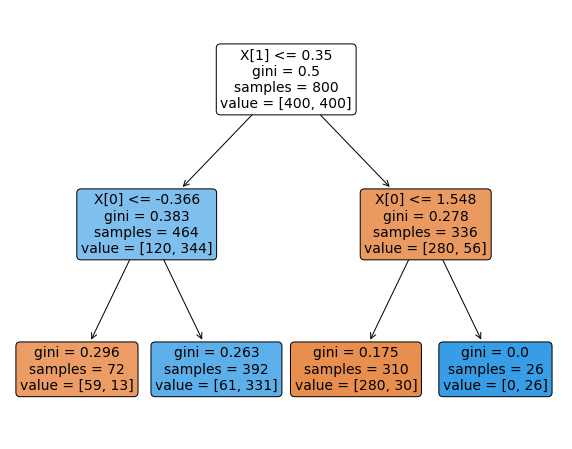

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(dt_clf2, filled=True, rounded=True)
plt.show()